In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [158]:
df = pd.read_csv('enhanced_anxiety_dataset.csv')
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [159]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [161]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

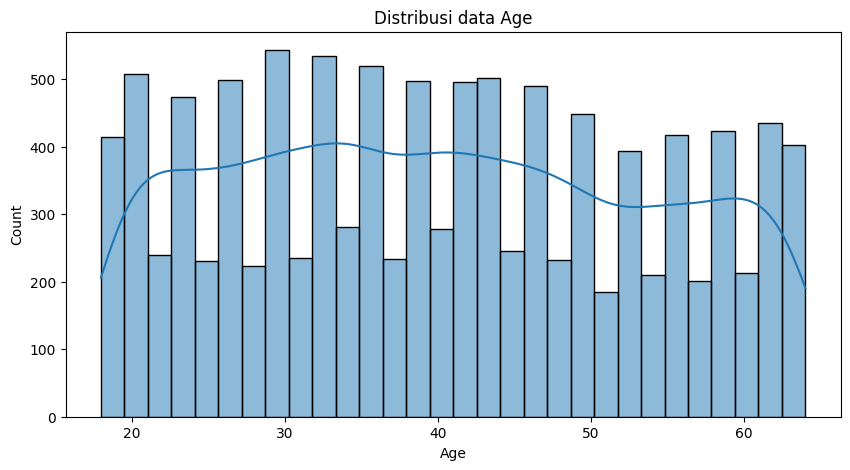

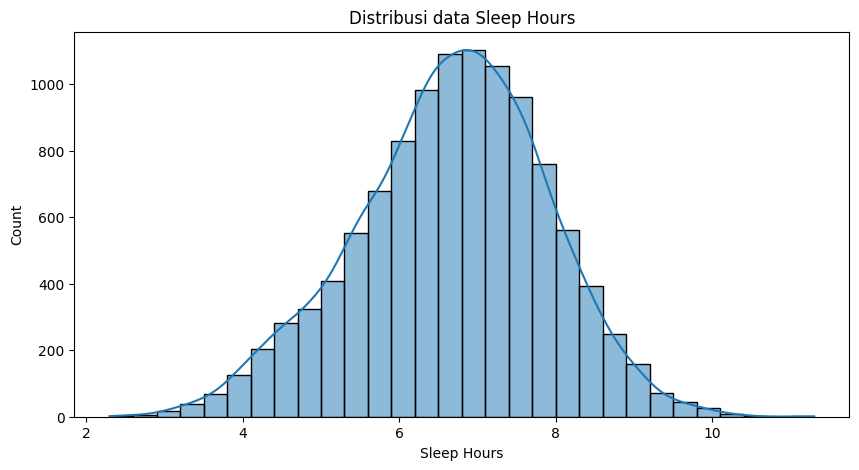

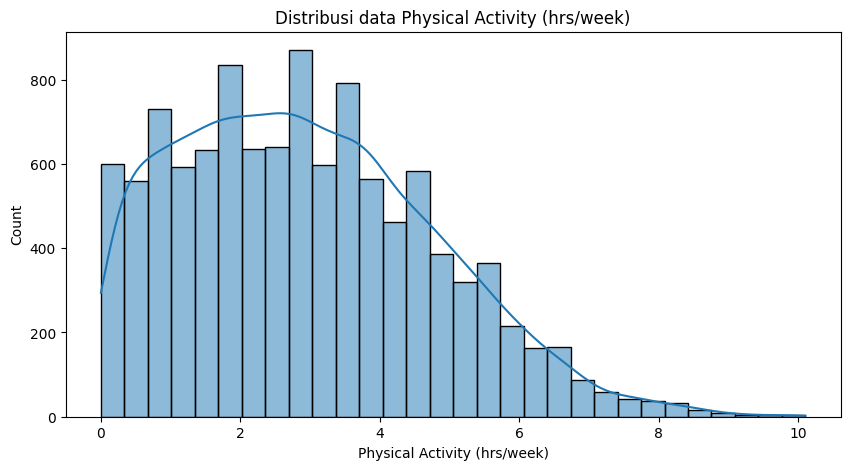

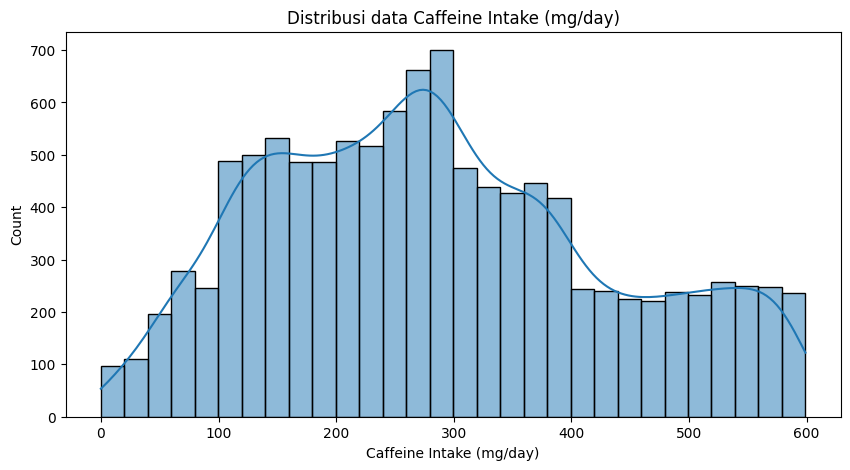

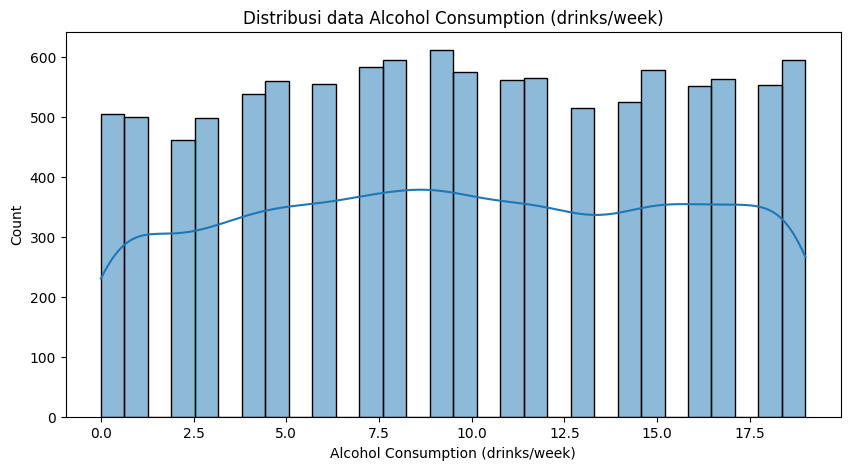

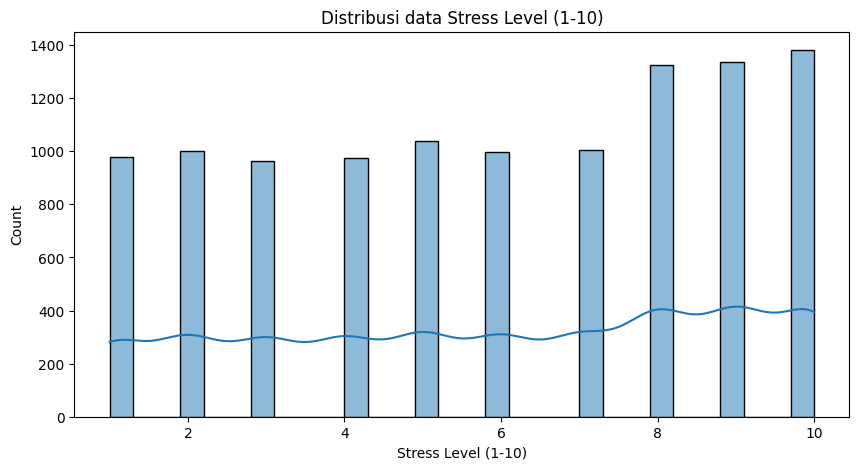

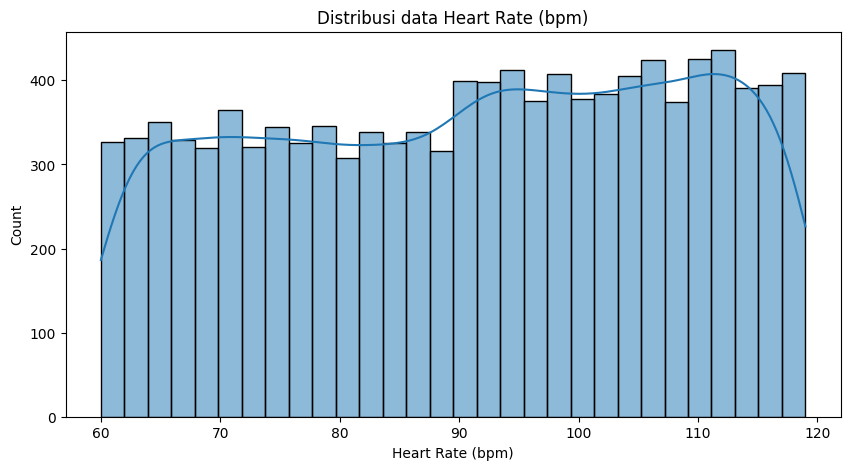

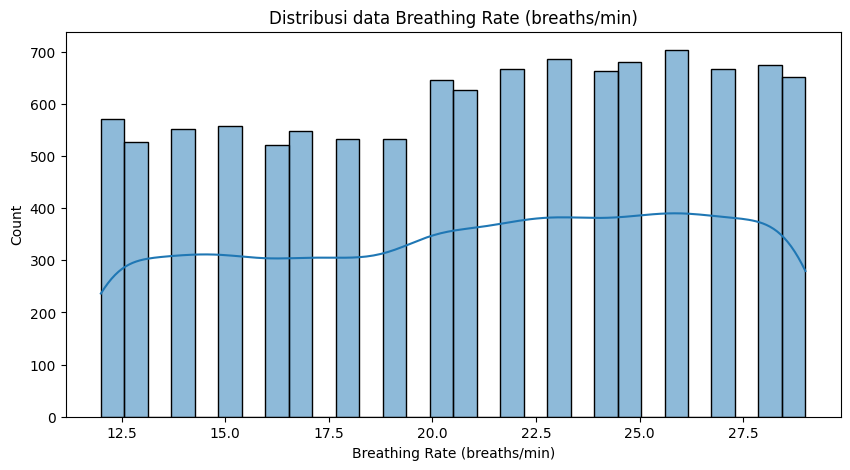

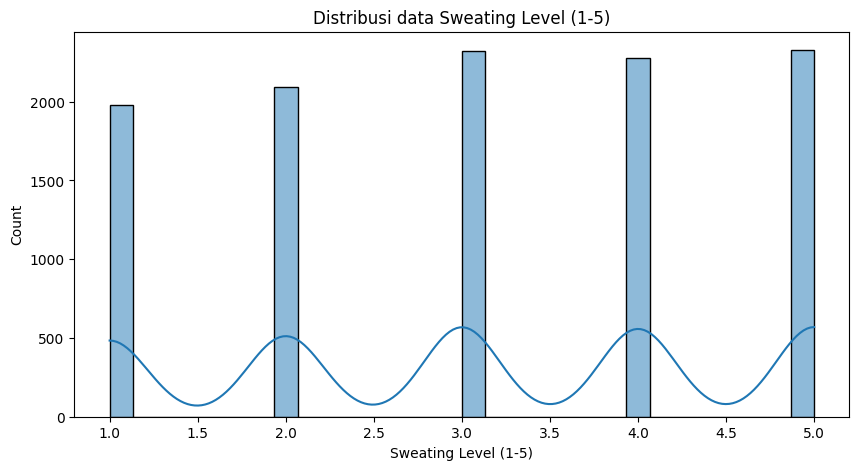

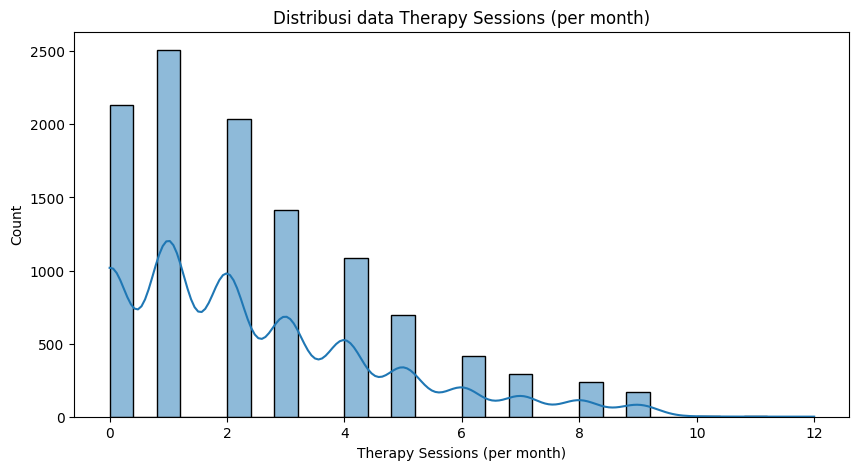

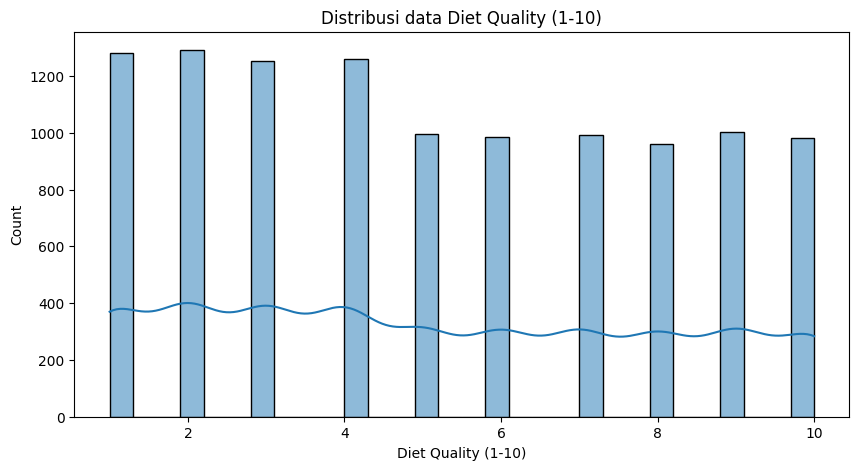

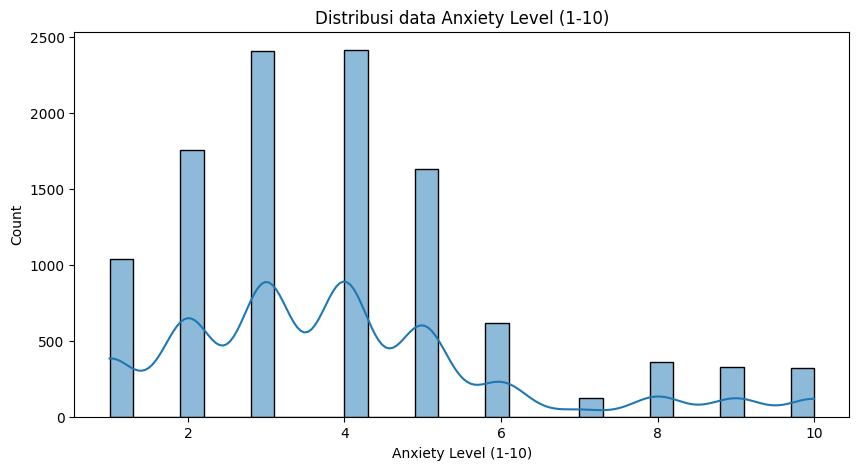

In [162]:
for i in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df[i], kde=True, bins=30)
    plt.title(f"Distribusi data {i}")
    plt.show()

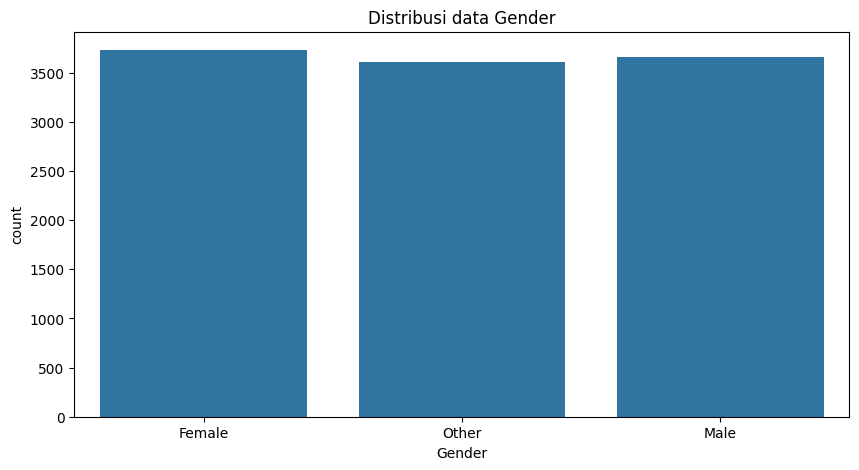

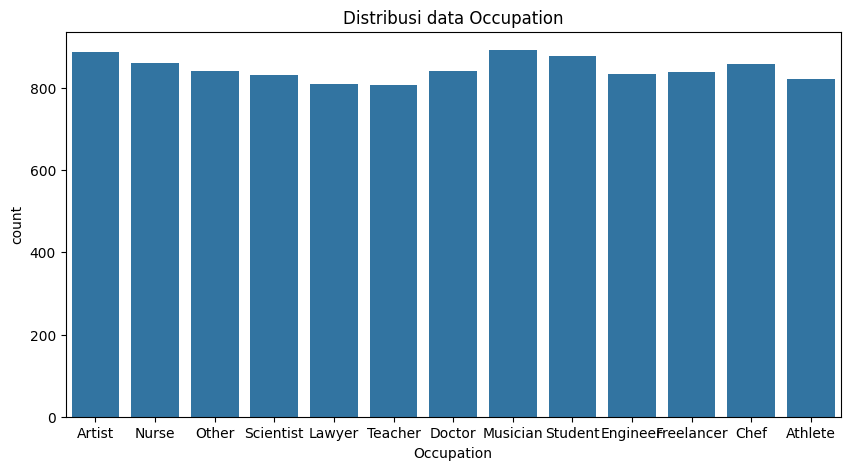

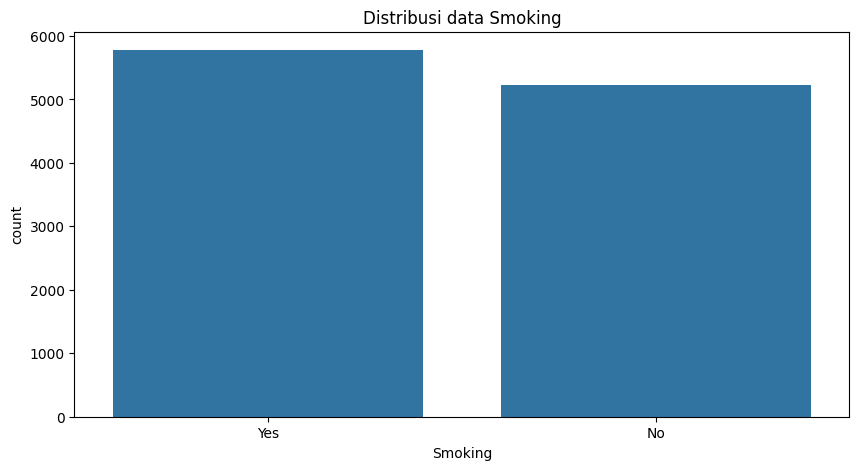

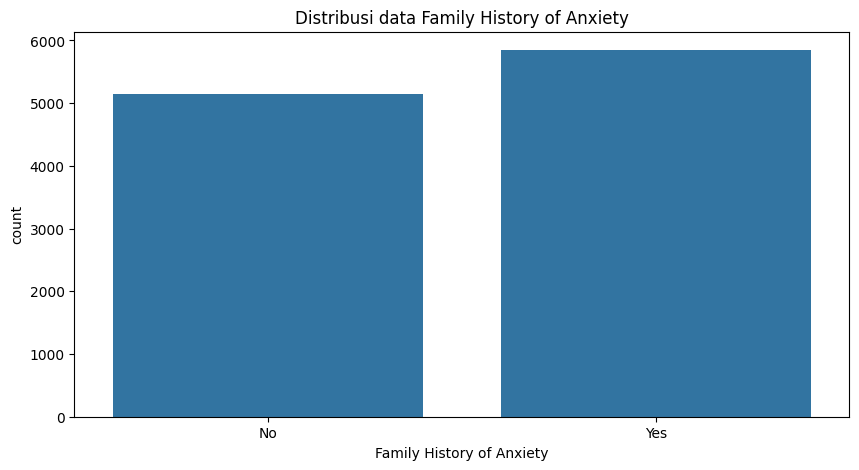

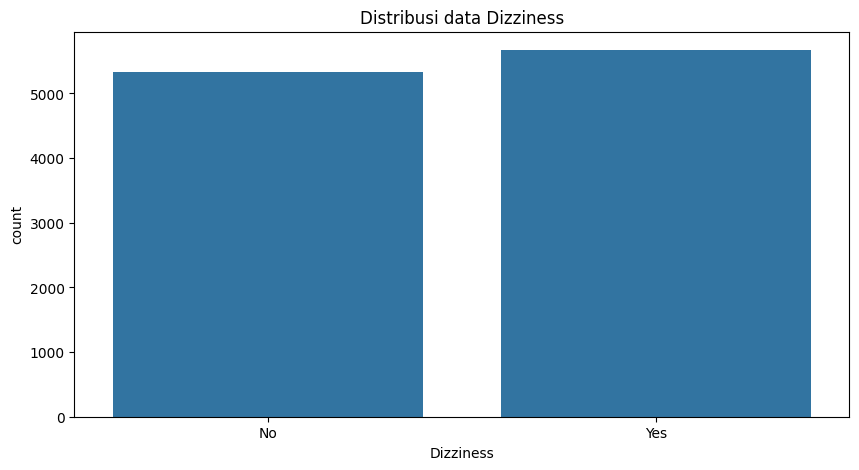

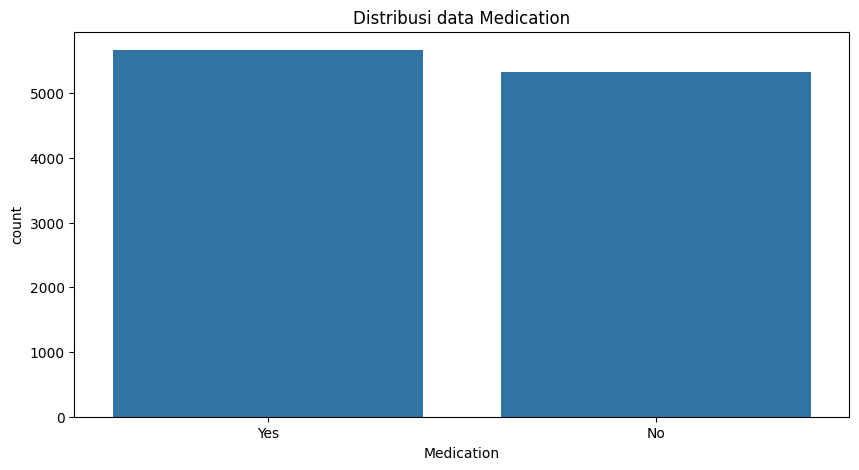

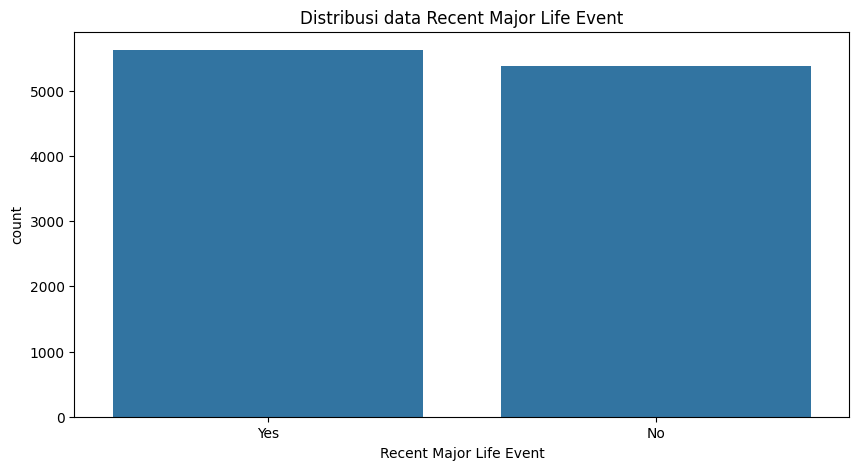

In [163]:
for i in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=i)
    plt.title(f"Distribusi data {i}")
    plt.show()

In [164]:
filtered_df = df[(df['Age'] >= 13) & (df['Age'] <= 27)]
filtered_df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,22.603470,6.997122,2.897588,287.899281,9.837495,5.904782,91.153195,20.914515,3.109606,2.502751,5.063055,3.925942
std,2.841677,1.318577,1.823861,144.400812,5.686399,2.902273,17.396489,5.192922,1.405898,2.243698,2.904754,2.256803
min,18.000000,2.600000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,20.000000,6.200000,1.400000,175.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,2.000000,2.000000
50%,23.000000,7.200000,2.700000,277.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,25.000000,7.900000,4.100000,380.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,27.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,11.000000,10.000000,10.000000


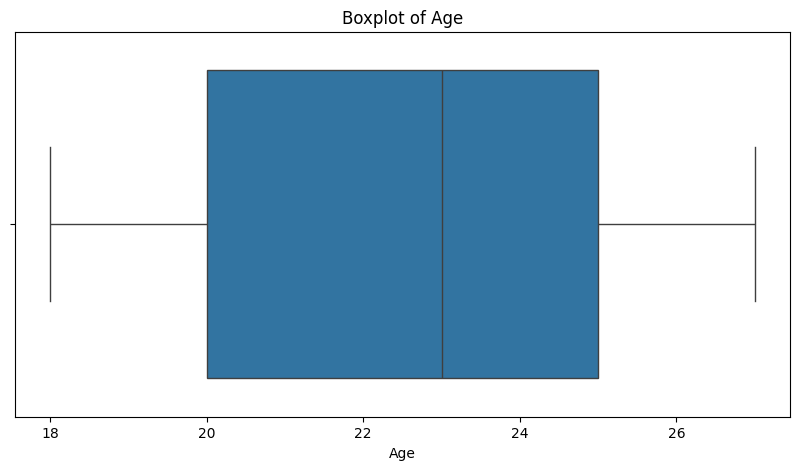

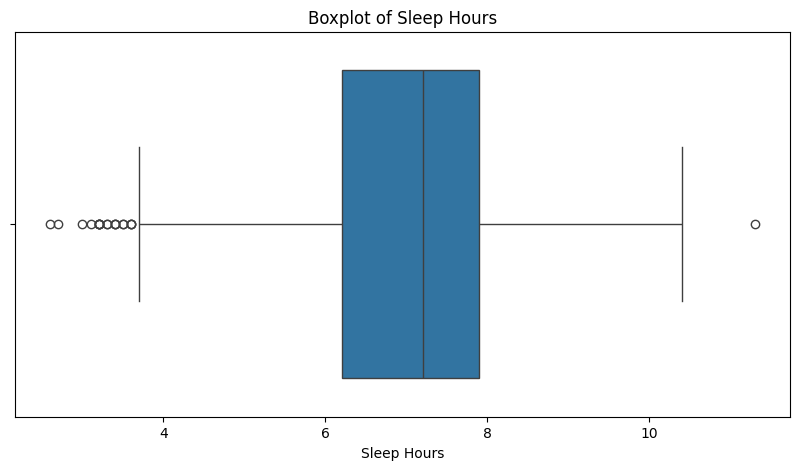

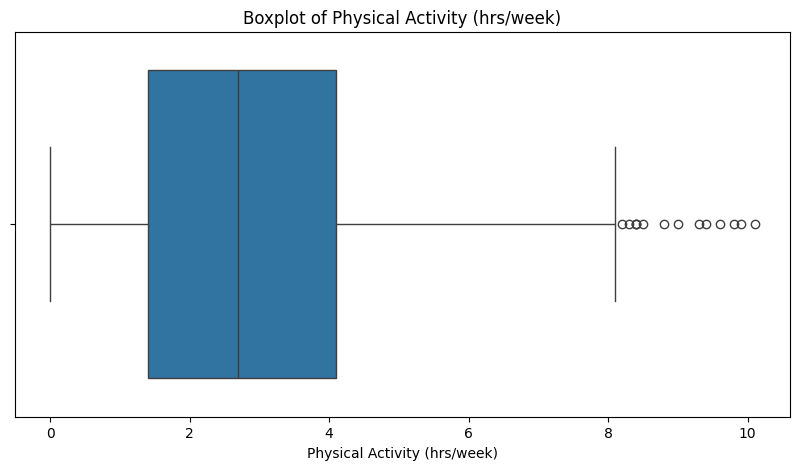

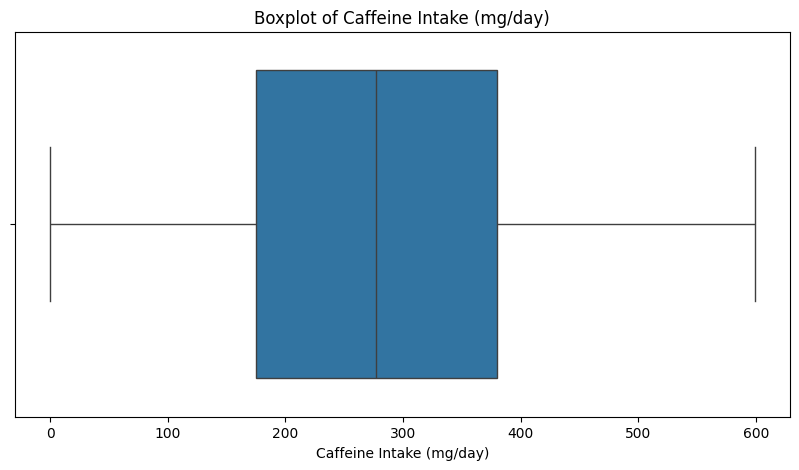

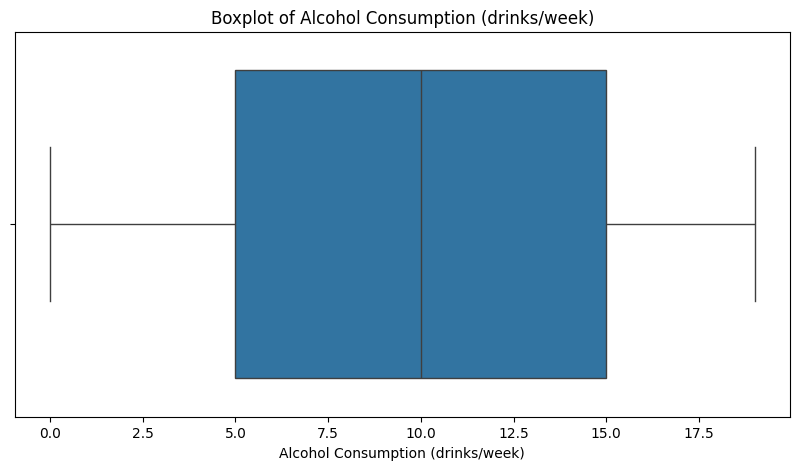

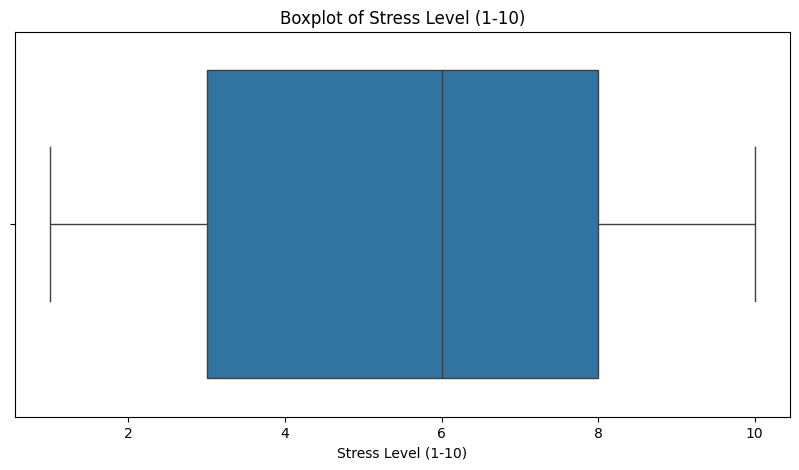

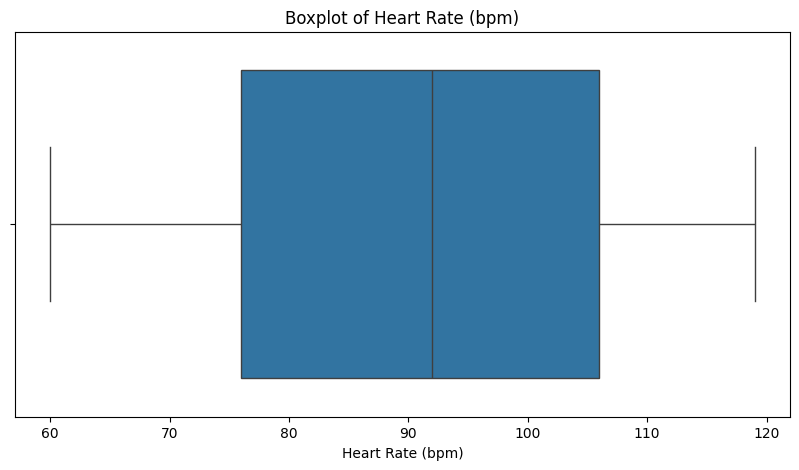

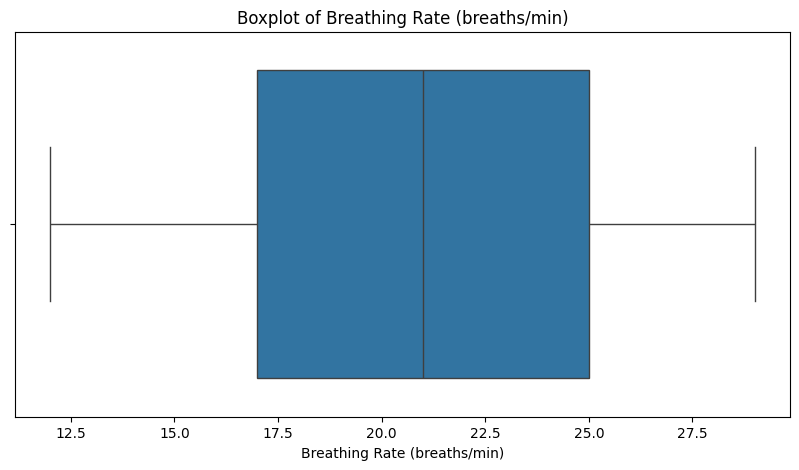

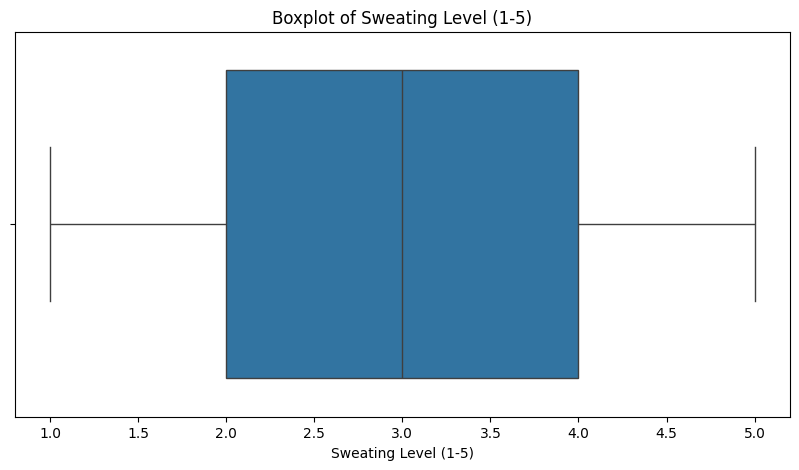

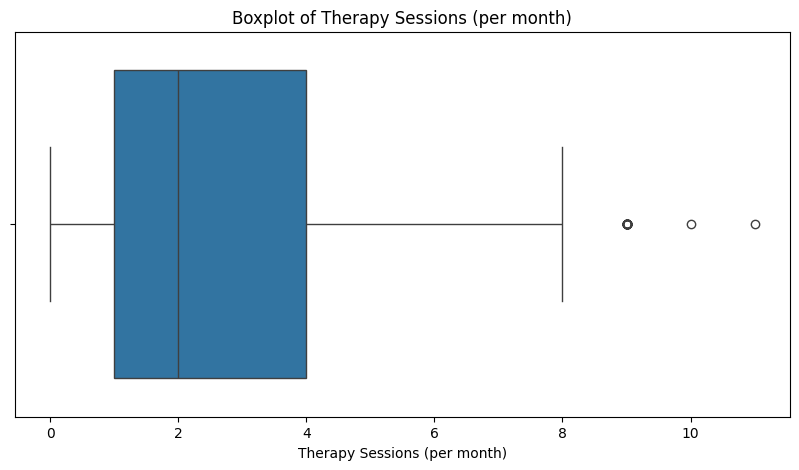

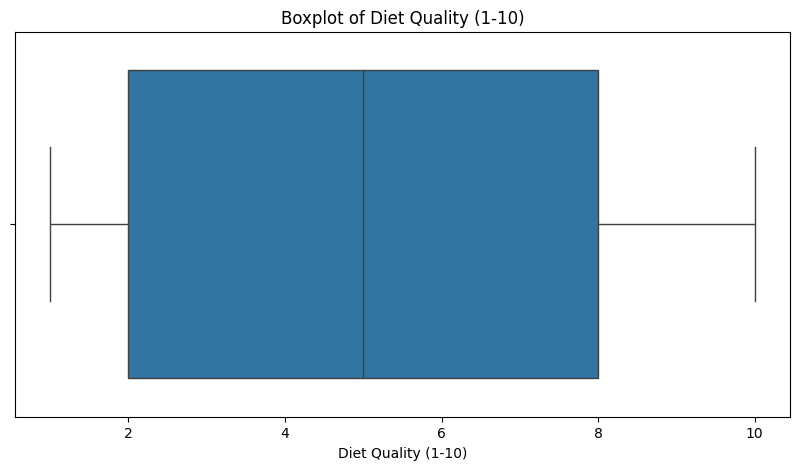

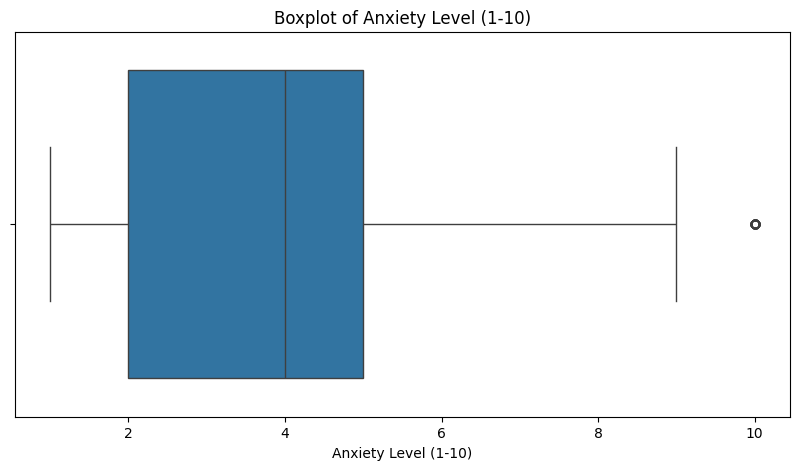

In [165]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=filtered_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [166]:
filtered_df.isna().sum()

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0


In [167]:
df.duplicated().sum()

np.int64(0)

In [168]:
y = filtered_df["Anxiety Level (1-10)"]
X = filtered_df.drop(columns="Anxiety Level (1-10)")
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(exclude='object').columns.tolist()

In [169]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())

])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10)
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1
6,20,Male,Artist,7.9,2.5,78,14,Yes,No,8,118,21,5,Yes,No,1,Yes,2
20,26,Male,Other,6.9,1.8,95,1,No,Yes,5,113,22,3,No,Yes,2,Yes,8
27,27,Female,Student,7.1,5.3,385,19,No,Yes,6,100,13,5,Yes,Yes,3,Yes,10
36,20,Female,Doctor,6.2,0.8,599,5,No,Yes,3,100,17,1,No,Yes,2,Yes,8


In [171]:
print(y.value_counts(normalize=True))

Anxiety Level (1-10)
3.0     0.215404
4.0     0.209479
2.0     0.166314
5.0     0.134575
1.0     0.110030
6.0     0.043589
8.0     0.040626
9.0     0.035971
10.0    0.035971
7.0     0.008041
Name: proportion, dtype: float64


In [172]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
])

lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor())
])

lgbm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LGBMRegressor())
])

In [173]:
rf_model = rf.fit(X_train, y_train)
lr_model = lr.fit(X_train, y_train)
xgb_model = xgb.fit(X_train, y_train)
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1890, number of used features: 37
[LightGBM] [Info] Start training from score 3.940741


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [174]:
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

for i in [rf_pred, lr_pred, xgb_pred, lgbm_pred]:
    print(f"accuracy", root_mean_squared_error(y_test, i))

accuracy 1.088554232514272
accuracy 1.1307929534097445
accuracy 1.1812442645567474
accuracy 1.1273051775583403


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [175]:
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
lgbm_pred = lgbm_model.predict(X_test)

for i in [rf_pred, lr_pred, xgb_pred, lgbm_pred]:
    print(f"accuracy", r2_score(y_test, i))

accuracy 0.7525040614847456
accuracy 0.7329244558636148
accuracy 0.7085612063469522
accuracy 0.734569430903603


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [176]:
rf_grid_params = {
    'regressor__n_estimators': [100, 200], # Fewer options, but generally good numbers
    'regressor__max_features': ['sqrt', 0.8], # Keep these common strategies
    'regressor__max_depth': [10, 20, None], # Focus on typical effective depths, or no limit
    # Keeping min_samples_split and min_samples_leaf to very common/default values
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [1]
}

xgboost_grid_params = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5], # Reduce depth options
    'regressor__subsample': [0.8], # Pick a common good value
    'regressor__colsample_bytree': [0.8], # Pick a common good value
    'regressor__gamma': [0] # Try without gamma or a single small value
}

lgbm_grid_params = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__num_leaves': [20, 31], # Fewer, more focused options
    'regressor__max_depth': [-1], # Often fine to let it grow fully, or pick a single limit like 10
    'regressor__subsample': [0.8],
    'regressor__colsample_bytree': [0.8],
    'regressor__reg_alpha': [0], # Simplify regularization
    'regressor__reg_lambda': [0]
}

def tuning(model, grid_params=None):
  pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
  grid = GridSearchCV(pipe, param_grid=grid_params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
  grid.fit(X_train, y_train)
  print(f"→ Best params for {model.__class__.__name__}: {grid.best_params_}")
  return grid.best_estimator_

In [177]:
rf_tuning_model = tuning(RandomForestRegressor(), rf_grid_params)

→ Best params for RandomForestRegressor: {'regressor__max_depth': 10, 'regressor__max_features': 0.8, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}


In [178]:
xgb_tuning_model = tuning(XGBRegressor(max_iter=1000), xgboost_grid_params)

→ Best params for XGBRegressor: {'regressor__colsample_bytree': 0.8, 'regressor__gamma': 0, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


In [179]:
lgbm_tuning_model = tuning(LGBMRegressor(max_iter=1000), lgbm_grid_params)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `max_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] num_iterations is set=1000, max_iter=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 1890, number of used features: 37
[LightGBM] [Info] Start training from score 3.940741
→ Best params for LGBMRegressor: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': -1, 'regressor__n_estimators': 100, 'regressor__num_leaves': 20, 'regressor__reg_alpha': 0, 'regressor__reg_lambda': 0, 'regressor__subsample': 0.8}


In [180]:
models = {
    'RandomForest': rf_tuning_model,
    'XGBoost':   xgb_tuning_model,
    'LightGBM': lgbm_tuning_model
}

In [181]:
result = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    result.append({
        'model': name,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    })
    print(f"{name}")
    print(f"mse: {mse}")
    print(f"rmse: {rmse}")
    print(f"r2: {r2}")

RandomForest
mse: 1.1556962462273928
rmse: 1.0750331372694484
r2: 0.758614244863318
XGBoost
mse: 1.1554253126420184
rmse: 1.0749071181465022
r2: 0.7586708337017009
LightGBM
mse: 1.3552572954996176
rmse: 1.1641551853166388
r2: 0.7169327089652022


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [183]:
results_df = pd.DataFrame(result).set_index('model')
print("Summary:\n", results_df.sort_values('rmse', ascending=True))

Summary:
                    mse      rmse        r2
model                                     
XGBoost       1.155425  1.074907  0.758671
RandomForest  1.155696  1.075033  0.758614
LightGBM      1.355257  1.164155  0.716933


In [184]:
best_name = results_df['rmse'].idxmax()
best_model = models[best_name]
print(f"\n>> Best model: {best_name} <<")


>> Best model: LightGBM <<


In [185]:
import joblib
joblib.dump(xgb_tuning_model, "model.joblib")

['model.joblib']